# Association of Amygdala Cannabinoid Receptor 1 Availability and Pain Response in Trauma-Exposed Adults

Korem et al., 2024

1. Check for association between Cannabinoid 1 recptor availability and amygdala activation in response to shock

2. Check for association between Cannabinoid 1 recptor availability and amygdala and Emotional numbing symptoms


In [1]:
# load libraries
import numpy as np
import pandas as pd
import scipy
from glob import glob

import nilearn
import nilearn.plotting
import nilearn.input_data

import pymc as pm
import arviz as az

import matplotlib.pyplot as plt
import seaborn as sns


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


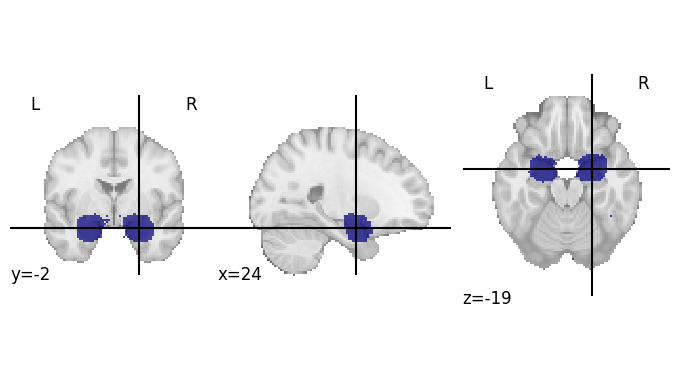

In [2]:
# Define the file path for the amygdala mask and apply thresholding
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=8", a=mask_file)

# Display the masked ROI
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

# Create a masker with specified parameters
fwhm = 4
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                                         sessions=None, smoothing_fwhm=fwhm, 
                                         standardize=False, detrend=False, 
                                         verbose=5)

In [3]:
def func_extract(cope_num):
    # Glob function files
    func_files = glob('/gpfs/gibbs/pi/levy_ifat/Nachshon/CB1/results/l1spm_resp/_subject_id_*/contrastestimate/con_000'+str(cope_num)+'.nii')
    
    # Initialize lists
    acq = []
    timeseriesAmg = []

    # Loop through functional files
    for func in func_files:
        # Extract subject ID from file path
        sub = func.split('/')[9].split('_')[-1]
        print(sub)
        
        # Transform functional data using masker
        tArr = masker.fit_transform(func)
        
        # Calculate mean, standard error of the mean, and standard deviation
        meanT = np.mean(tArr,axis=1)
        sem = scipy.stats.sem(tArr, axis=1)
        std = np.std(tArr, axis=1)

        # Create dataframe for time series data
        dfTS = {'subject':sub, 'ts':tArr[0]}
        
        # Create dataframe for mean activation
        df = {'subject':sub, 'ROI':meanT[0], 'ROIsem':sem[0], 'ROIstd':std[0]}
        
        # Append dataframes to lists
        acq.append(df)
        timeseriesAmg.append(dfTS)

    # Create dataframes from lists
    amg_acq = pd.DataFrame(acq)
    tsDf = pd.DataFrame(timeseriesAmg)

    # Convert subject column to integer type
    amg_acq['sub'] = amg_acq['subject'].astype('int')
    
    return amg_acq, tsDf


1652
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1772
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1403
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1631
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1721
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1797
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1347
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1666
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1586
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1708
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1653
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1554
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1623
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1713
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1696
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1695
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1656
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1286
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1730
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1593
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1710
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1733
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1643
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1714
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1707
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1718
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1599
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1649
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1424
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1609
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1571
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
1712
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/gpfs/gibbs/project/levy_ifat/nk549/conda_envs/fmri/lib/python3.11/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


<AxesSubplot: xlabel='ROI', ylabel='Count'>

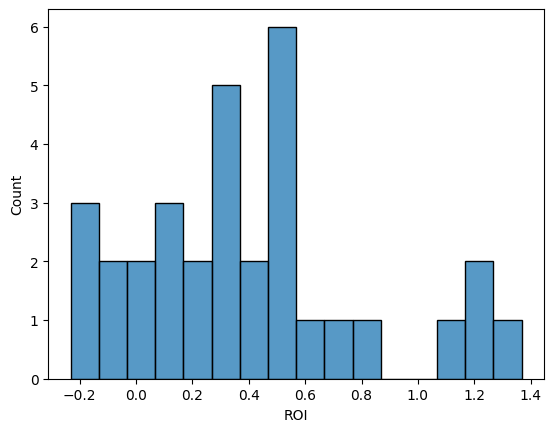

In [4]:
# Extract data using func_extract function
us, usSD = func_extract(1)

# Plot histogram of ROI data
sns.histplot(data=us, x='ROI', bins=5, binwidth=0.1)

In [5]:
# Load PET data from CSV file
pet = pd.read_csv('pet.csv', sep=',')

# Merge PET data with fMRI data
df = us.merge(pet, left_on='sub', right_on='sub')

# Rename the mean activation column to 'AmyPain'
df.rename(columns={'ROI': 'AmyPain'}, inplace=True)

# Standardize age and BMI
df['AgeZ'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['BMIZ'] = (df['BMI'] - df['BMI'].mean()) / df['BMI'].std()

# Display the first few rows of the DataFrame
df.head()

,subject,AmyPain,ROIsem,ROIstd,sub,PatientID,amygdala,caudate,cerebellum,cingulum_ant,...,sex,BMI,correction,ID,PTSD,Group,whole_brain,EN,AgeZ,BMIZ
0,1652,-0.149553,0.006077,0.327343,1652,AT056,1.330990,0.799956,1.233901,1.400832,...,1,28.641978,1,CB1652,No,0,1.417342,10.0,0.803778,-0.135452
1,1772,0.669041,0.009166,0.493777,1772,CT927,1.109380,0.817904,0.996613,1.251136,...,0,26.299357,1,CB1772,Yes,1,1.245672,5.0,1.217912,-0.536521
2,1403,-0.122718,0.005947,0.320363,1403,MN272,1.237694,0.804063,1.123062,1.218642,...,1,27.700830,1,CB1403,No,0,1.179983,0.0,-0.438627,-0.296581
3,1631,0.305351,0.005694,0.306754,1631,LR949,1.428932,1.093800,1.201192,1.407530,...,1,24.913493,1,CB1631,No,0,1.347130,0.0,-0.783739,-0.773788
4,1721,1.110839,0.010494,0.565329,1721,AM351,1.481286,1.225295,1.263482,1.461707,...,0,36.580058,1,CB1721,Yes,1,1.437707,9.0,-0.369604,1.223590


In [6]:
# Fill missing values with 0 and filter PET outliers rows where amygdala values are greater than 0.8
df1 = df.fillna(0)
df1 = df1[df1['amygdala'] > 0.8]

# Print the shapes of the original and filtered DataFrames
print(df.shape, df1.shape)

(31, 30) (30, 30)


In [7]:
print("females: ", df1[df1['sex']==0].shape[0], 
      "\nPTSD: ", df1[df1['PTSD']=='Yes'].shape[0], 
      "\nage [SD]:",round(df['age'].mean(),1), "[",round(df['age'].std(),1),"]")

females:  6 
PTSD:  9 
age [SD]: 44.4 [ 14.5 ]


In [8]:
with pm.Model() as RR:
    # Define priors for regression coefficients
    a  = pm.Normal('intercept', 1, 1)
    b  = pm.Normal('slope',     0, 1)
    s  = pm.Normal('Sex',       0, 1)
    ag = pm.Normal('Age',       0, 1)
    bm = pm.Normal('BMI',       0, 1)
    
    # Define error term
    eps = pm.Exponential('eps', 1)
    
    # Define the Student's t likelihood with nu as the degrees of freedom
    y_hat = a + b * df1.amygdala + s * df1.sex + ag * df1.AgeZ + bm * df1.BMIZ
    nu = pm.InverseGamma("nu", alpha=3, beta=1)
    likelihood = pm.StudentT("likelihood", mu=y_hat, sigma=eps, nu=nu, observed=df1.AmyPain)

    # Sample from the posterior
    trace = pm.sample()

# Summarize the posterior distribution
az.summary(trace, hdi_prob=.89)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, Sex, Age, BMI, eps, nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,1.601,0.431,0.933,2.281,0.011,0.008,1616.0,1921.0,1.0
slope,-0.760,0.290,-1.215,-0.311,0.007,0.005,1764.0,2235.0,1.0
Sex,-0.229,0.146,-0.461,-0.001,0.003,0.002,2673.0,2258.0,1.0
Age,-0.072,0.058,-0.161,0.020,0.001,0.001,2653.0,2231.0,1.0
BMI,0.202,0.109,0.030,0.369,0.002,0.002,2082.0,2290.0,1.0
eps,0.240,0.067,0.127,0.333,0.002,0.001,1509.0,983.0,1.0
nu,2.199,1.595,0.638,3.680,0.035,0.024,2089.0,1815.0,1.0


In [9]:
# Concatenate samples from the posterior for intercept and slope
intercept_samples = np.concatenate(trace.posterior['intercept'].values)
slope_samples = np.concatenate(trace.posterior['slope'].values)

# Reshape slope_samples to perform element-wise multiplication across amygdala_values
slope_samples_reshaped = slope_samples[:, np.newaxis]

# Define the range of amygdala values
amygdala_values = np.linspace(df1.amygdala.min(), df1.amygdala.max(), 100)

# Calculate the posterior predictive lines for each amygdala value
posterior_lines = intercept_samples[:, np.newaxis] + slope_samples_reshaped * amygdala_values

# Calculate the credible interval for each point in amygdala_values
lower_bound = np.percentile(posterior_lines, 5.5, axis=0)
upper_bound = np.percentile(posterior_lines, 94.5, axis=0)

# Extract mean and credible interval of the slope parameter
slope_mean = az.summary(trace, var_names=['slope'], hdi_prob=.89)['mean'][0]
slope_lower = az.summary(trace, var_names=['slope'], hdi_prob=.89)['hdi_5.5%'][0]
slope_upper = az.summary(trace, var_names=['slope'], hdi_prob=.89)['hdi_94.5%'][0]

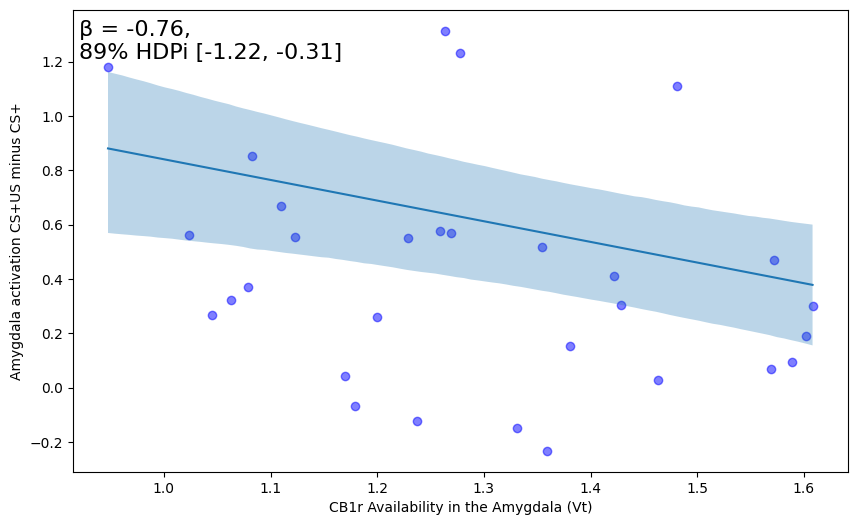

In [10]:
# Plotting the mean line and credible interval
plt.figure(figsize=(10, 6))
plt.scatter(df1.amygdala, df1.AmyPain, color='blue', alpha=0.5)  # Scatter plot of the data points

plt.plot(amygdala_values, pl.mean(axis=0))  # Plot the mean prediction line
plt.fill_between(amygdala_values, lb, ub, alpha=0.3)  # Plot the credible interval

# Annotate the plot with slope parameter information
text = 'β = {},\n89% HDPi [{}, {}]'.format(round(Ab, 2), round(Ab1, 2), round(Ab2, 2))
plt.text(.92, 1.21, text, fontsize=16)

plt.xlabel('CB1R Availability in the Amygdala (Vt)')
plt.ylabel('Amygdala Activation (CS+US minus CS+)')
plt.show()

In [11]:
# Zero-Inflated Poisson (ZIP) Model
with pm.Model() as model_zi:
    # Priors for usual regression coefficients
    a  = pm.Normal('intercept', 1, 1)  # Prior for intercept
    b  = pm.Normal('slope',     0, 1)  # Prior for slope
    s  = pm.Normal('Sex',       0, 1)  # Prior for Sex
    ag = pm.Normal('Age',       0, 1)  # Prior for Age
    bm = pm.Normal('BMI',       0, 1)  # Prior for BMI
    
    # Linear model for Poisson mean
    log_mu = a + b * df1.amygdala + s * df1.sex + ag * df1.AgeZ + bm * df1.BMIZ
    mu = pm.math.exp(log_mu)  # Exponentiate to ensure mu is positive
    
    # Model for the probability of extra zeros
    psi = pm.Beta('psi', alpha=1, beta=1)  
    
    # Zero-inflated component
    y_obs = pm.ZeroInflatedPoisson('y_obs', psi=psi, mu=mu, observed=df1.EN)  # Likelihood
    trace_zi = pm.sample()
    
az.summary(trace_zi, hdi_prob=.89)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, Sex, Age, BMI, psi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.798,0.555,-0.146,1.619,0.013,0.010,1817.0,1860.0,1.0
slope,0.701,0.381,0.091,1.306,0.009,0.006,1912.0,1956.0,1.0
Sex,0.071,0.219,-0.295,0.398,0.004,0.003,2641.0,2631.0,1.0
Age,-0.065,0.121,-0.270,0.118,0.002,0.002,3052.0,2640.0,1.0
BMI,-0.137,0.129,-0.334,0.078,0.002,0.002,3178.0,2582.0,1.0
psi,0.535,0.091,0.398,0.690,0.002,0.001,3487.0,2512.0,1.0


In [12]:
# Extracting statistics for the slope parameter from the trace
Bb  = az.summary(trace_zi, var_names=['slope'])['mean'][0]
Bb1  = az.summary(trace_zi, var_names=['slope'], hdi_prob=.89)['hdi_5.5%'][0]
Bb2  = az.summary(trace_zi, var_names=['slope'], hdi_prob=.89)['hdi_94.5%'][0]


# Retrieve posterior samples
posterior = trace_zi.posterior
a_samples = posterior['intercept'].values.flatten()
b_samples = posterior['slope'].values.flatten()
s_samples = posterior['Sex'].values.flatten()
ag_samples = posterior['Age'].values.flatten()
bm_samples = posterior['BMI'].values.flatten()

# Number of posterior samples
n_samples = len(a_samples)

# Calculate the mean values of sex, age, and BMI
sex_mean = df1.sex.mean()
age_mean = df1.AgeZ.mean()
bmi_mean = df1.BMIZ.mean()

# Prepare to store predictions for each amygdala value across all samples
mu_pred_samples = np.zeros((n_samples, len(amygdala_values)))

In [13]:
# Calculate mu for each posterior sample and amygdala value
for i in range(n_samples):
    mu_pred_samples[i, :] = np.exp(a_samples[i] +
                                   b_samples[i] * amygdala_values +
                                   s_samples[i] * sex_mean +
                                   ag_samples[i] * age_mean +
                                   bm_samples[i] * bmi_mean)

# Calculate lower and upper bounds for the 89% credible interval
lower_bound = np.percentile(mu_pred_samples, 5.5, axis=0)
upper_bound = np.percentile(mu_pred_samples, 94.5, axis=0)
mean_pred = np.mean(mu_pred_samples, axis=0)

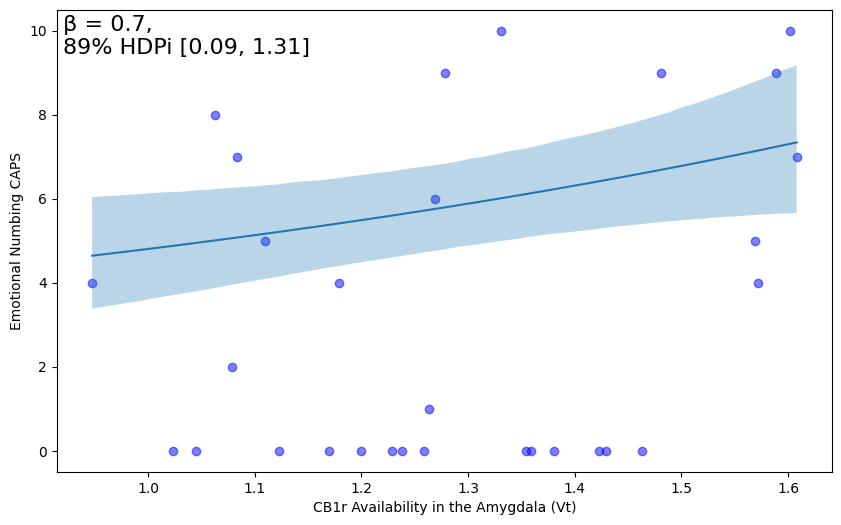

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df1.amygdala, df1.EN, color='blue', alpha=0.5)
plt.plot(amygdala_values, mean_pred,)
plt.fill_between(amygdala_values, lower_bound, upper_bound, alpha=0.3)

text = 'β = {},\n89% HDPi [{}, {}]'.format(round(Bb,2), round(Bb1,2), round(Bb2,2))
plt.text(.92, 9.45, text, fontsize=16)

plt.xlabel('CB1r Availability in the Amygdala (Vt)')
plt.ylabel('Emotional Numbing CAPS')
plt.show()

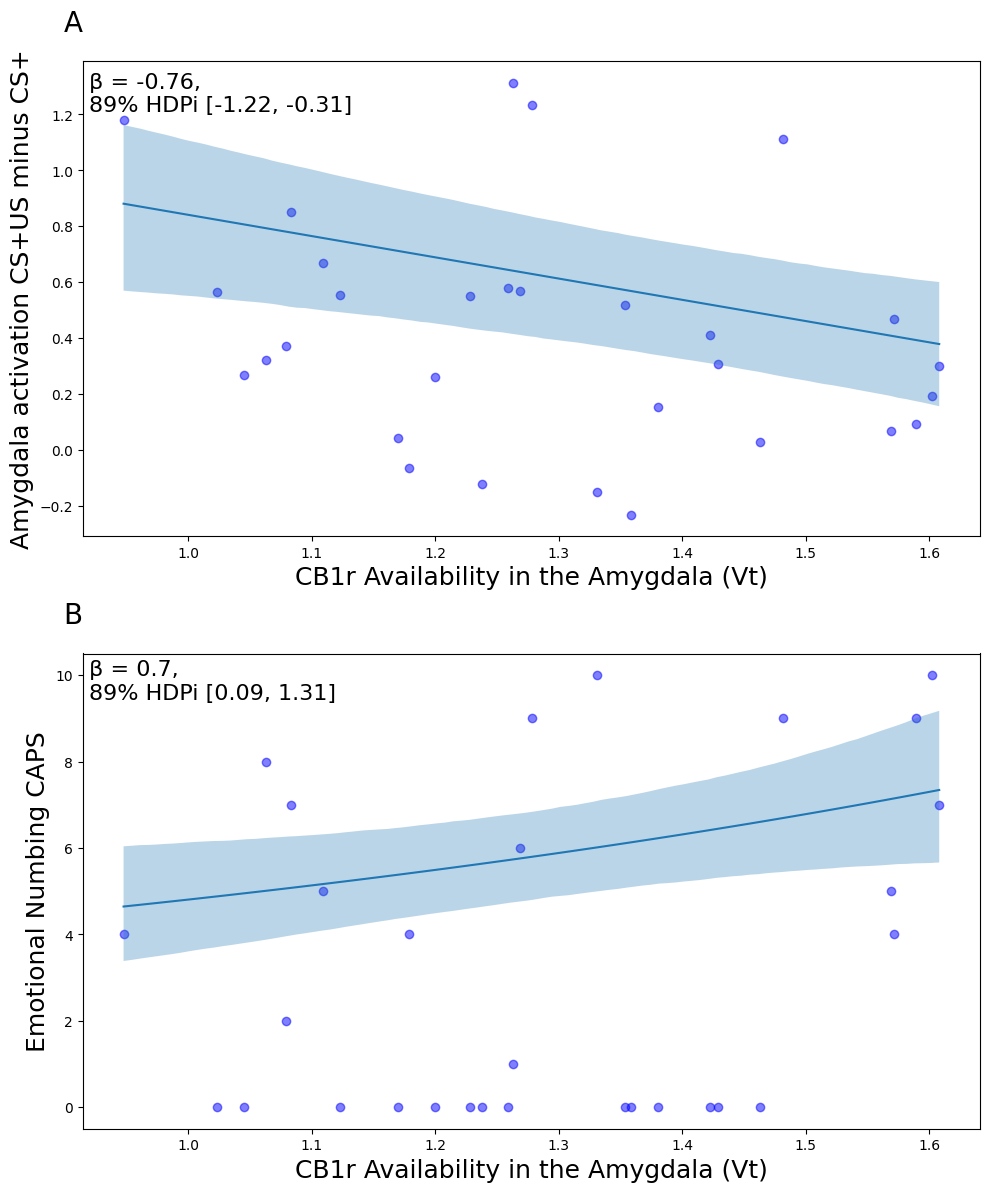

In [15]:
# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Figure 1 (upper plot)
ax1.scatter(df1.amygdala, df1.AmyPain, color='blue', alpha=0.5)
ax1.plot(amygdala_values, pl.mean(axis=0))
ax1.fill_between(amygdala_values, lb, ub, alpha=0.3)
text_A = 'β = {},\n89% HDPi [{}, {}]'.format(round(Ab,2), round(Ab1,2), round(Ab2,2))
ax1.text(.92, 1.21, text_A, fontsize=16)
ax1.set_xlabel('CB1r Availability in the Amygdala (Vt)', fontsize=18)
ax1.set_ylabel('Amygdala activation CS+US minus CS+', fontsize=18)
ax1.text(0, 1.05, 'A', transform=ax1.transAxes, fontsize=20, va='bottom', ha='right')

# Plot for Figure 2 (lower plot)
ax2.scatter(df1.amygdala, df1.EN, color='blue', alpha=0.5)
ax2.plot(amygdala_values, mean_pred)
ax2.fill_between(amygdala_values, lower_bound, upper_bound, alpha=0.3)
text_B = 'β = {},\n89% HDPi [{}, {}]'.format(round(Bb,2), round(Bb1,2), round(Bb2,2))
ax2.text(.92, 9.45, text_B, fontsize=16)
ax2.set_xlabel('CB1r Availability in the Amygdala (Vt)', fontsize=18)
ax2.set_ylabel('Emotional Numbing CAPS', fontsize=18)
ax2.text(0, 1.05, 'B', transform=ax2.transAxes, fontsize=20, va='bottom', ha='right')

# Adjust the layout so labels and titles do not overlap
plt.tight_layout()
plt.show()